# Exercício 3
## Dados desbalanceados
### Grupo: 05
### Alunos:

- Gabriel Bortoli: 5378290
- Lucas Maretti: 6789752

---

No dataset que será utilizado nesse exercício, cada elemento representa uma transação com cartões de crédito. 

A base possui 30 atributos. `Time` representa o tempo em segundos desde a primeira transação da base. `Amount` corresponde ao valor da transação.

Outros 28 atributos numéricos anonimizados também são fornecidos, com 1 variável (`Class`) de saída onde 1 significa fraude e 0 transação normal.

**Esse exerício possui material complementar ("Undersampling e Oversampling")**

### Questão 01.
Carregue o dataset `creditcard_sampled.csv` e mostre a distribuição das classes:

*   Via histograma
*   Exibindo o número de ocorrências de cada classe



In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# from google.colab import drive
# drive.mount('/content/gdrive')

In [2]:
dados = pd.read_csv('creditcard_sampled.csv', index_col=0)
dados.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10492 entries, 541 to 87896
Data columns (total 31 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Time    10492 non-null  float64
 1   V1      10492 non-null  float64
 2   V2      10492 non-null  float64
 3   V3      10492 non-null  float64
 4   V4      10492 non-null  float64
 5   V5      10492 non-null  float64
 6   V6      10492 non-null  float64
 7   V7      10492 non-null  float64
 8   V8      10492 non-null  float64
 9   V9      10492 non-null  float64
 10  V10     10492 non-null  float64
 11  V11     10492 non-null  float64
 12  V12     10492 non-null  float64
 13  V13     10492 non-null  float64
 14  V14     10492 non-null  float64
 15  V15     10492 non-null  float64
 16  V16     10492 non-null  float64
 17  V17     10492 non-null  float64
 18  V18     10492 non-null  float64
 19  V19     10492 non-null  float64
 20  V20     10492 non-null  float64
 21  V21     10492 non-null  float64
 

array([[<AxesSubplot: title={'center': 'Class'}>]], dtype=object)

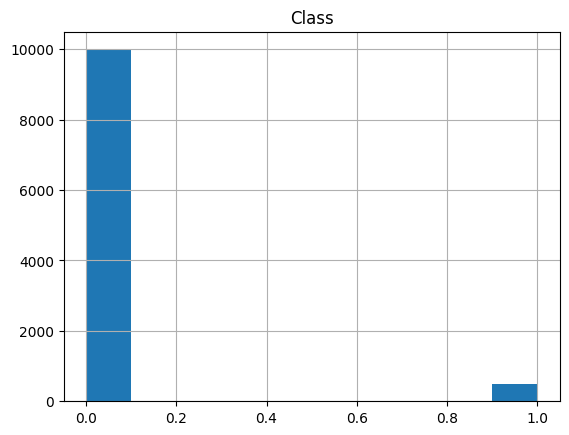

In [3]:
dados.hist('Class')

In [4]:
dados['Class'].value_counts()

0    10000
1      492
Name: Class, dtype: int64

In [6]:
dados.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
541,406.0,-2.312227,1.951992,-1.609851,3.997906,-0.522188,-1.426545,-2.537387,1.391657,-2.770089,...,0.517232,-0.035049,-0.465211,0.320198,0.044519,0.177840,0.261145,-0.143276,0.00,1
623,472.0,-3.043541,-3.157307,1.088463,2.288644,1.359805,-1.064823,0.325574,-0.067794,-0.270953,...,0.661696,0.435477,1.375966,-0.293803,0.279798,-0.145362,-0.252773,0.035764,529.00,1
4920,4462.0,-2.303350,1.759247,-0.359745,2.330243,-0.821628,-0.075788,0.562320,-0.399147,-0.238253,...,-0.294166,-0.932391,0.172726,-0.087330,-0.156114,-0.542628,0.039566,-0.153029,239.93,1
6108,6986.0,-4.397974,1.358367,-2.592844,2.679787,-1.128131,-1.706536,-3.496197,-0.248778,-0.247768,...,0.573574,0.176968,-0.436207,-0.053502,0.252405,-0.657488,-0.827136,0.849573,59.00,1
6329,7519.0,1.234235,3.019740,-4.304597,4.732795,3.624201,-1.357746,1.713445,-0.496358,-1.282858,...,-0.379068,-0.704181,-0.656805,-1.632653,1.488901,0.566797,-0.010016,0.146793,1.00,1




---

### Questão 02.

Separe o conjunto de dados em variáveis de entrada e variável alvo.

In [128]:
inputs = dados.drop('Class', axis= 1)
targets = dados['Class']



---

### Questão 03.

Crie uma função que aplique a técnica de subamostragem aleatória nesse conjunto de dados. 
- Sua função deve receber como entrada a base normalizada e as classes.

- Sua função e deve retornar um novo conjunto onde todas as classes devem ter o número de ocorrências da classe com **menor representatividade no conjunto de dados inicial** e um array com as respectivas labels.
- Mostre o resultado plotando um histograma da distribuição resultante classes 

In [90]:
# Iremos considerar que os dados recebidos pela função sejam os dataframes com todas as variáveis e outro apenas com os targets.
# A função irá uní-los para fazer os cálculos e depois retornar os dataframes separados novamente.

def undersample(inputs, targets):

  df = pd.concat([inputs,targets], axis= 1)

  df_0 = df[df[targets.name] == np.unique(targets)[0]]
  df_1 = df[df[targets.name] == np.unique(targets)[1]]
  
  if len(df_0) < len(df_1):
    amostra_u = df_1.sample(n= len(df_0), replace= False)
    result = pd.concat([df_0, amostra_u], axis= 0)
  else:
    amostra_u = df_0.sample(n= len(df_1), replace= False)
    result = pd.concat([df_1, amostra_u], axis= 0)
  
  undersampled_data = result.drop(targets.name, axis= 1)
  undersampled_targets = result[targets.name]

  return undersampled_data, undersampled_targets

undersampled_data, undersampled_targets = undersample(inputs, targets)

1    492
0    492
Name: Class, dtype: int64


<AxesSubplot: >

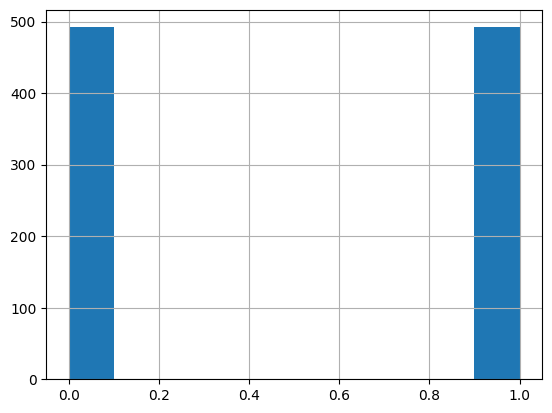

In [96]:
print(undersampled_targets.value_counts())
undersampled_targets.hist()



---

### Questão 04.

Crie uma função que aplique a técnica de superamostragem aleatória nesse conjunto de dados. 

- Sua função deve receber como entrada a base normalizada e as classes.

- Sua função deve receber como entrada a base original e retornar um novo conjunto de dados onde todas as classes devem ter o número de ocorrências da classe com **maior representatividade no conjunto de dados inicial** e um array com as respectivas labels.
- Mostre o resultado plotando um histograma da distribuição resultante classes 

In [104]:
def oversample(inputs, targets):

  df = pd.concat([inputs,targets], axis= 1)

  df_0 = df[df[targets.name] == np.unique(targets)[0]]
  df_1 = df[df[targets.name] == np.unique(targets)[1]]
  
  if len(df_0) > len(df_1):
    amostra_o = df_1.sample(n= len(df_0), replace= True)
    result = pd.concat([df_0, amostra_o], axis= 0)
  else:
    amostra_o = df_0.sample(n= len(df_1), replace= True)
    result = pd.concat([df_1, amostra_o], axis= 0)
  
  oversampled_data = result.drop(targets.name, axis= 1)
  oversampled_targets = result[targets.name]

  return oversampled_data, oversampled_targets

oversampled_data, oversampled_targets = oversample(inputs, targets)

0    10000
1    10000
Name: Class, dtype: int64


<AxesSubplot: >

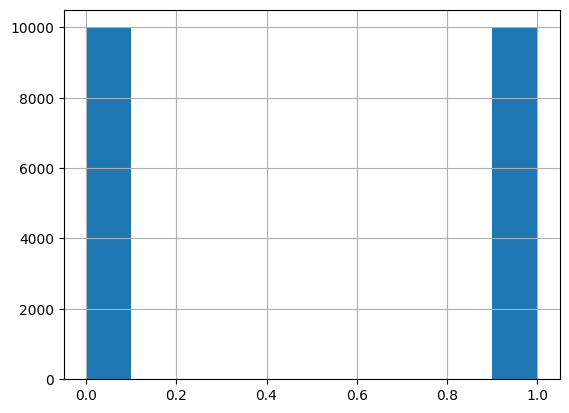

In [105]:
print(oversampled_targets.value_counts())
oversampled_targets.hist()

---

### Questão 05.

Crie uma função que utilize técnicas de subamostragem e superamostragem nesse conjunto de dados para balancear o número de exemplos de cada classe.

- Sua função deve receber como entrada a base normalizada e as classes.
- Sua função deve receber como entrada a base original e retornar uma nova base onde todas as classes devem ter o número de ocorrências **igual à $\frac{tamanho\_dataset}{3}$** e um array com as respectivas labels.
- Mostre o resultado plotando um histograma da distribuição resultante classes 

In [117]:
def dataset_sample(inputs, targets):

  df = pd.concat([inputs,targets], axis= 1)

  df_0 = df[df[targets.name] == np.unique(targets)[0]]
  df_1 = df[df[targets.name] == np.unique(targets)[1]]
  
  size = len(df) // 3 # Para facilitar os cálculos, usamos a divisão com floor.

  if len(df_0) > len(df_1):
    amostra_u = df_0.sample(n= size, replace= False)
    amostra_o = df_1.sample(n= size, replace= True)
    result = pd.concat([amostra_u, amostra_o], axis= 0)
  else:
    amostra_u = df_1.sample(n= size, replace= False)
    amostra_o = df_0.sample(n= size, replace= True)
    result = pd.concat([amostra_u, amostra_o], axis= 0)
  
  dataset_sampled_data = result.drop(targets.name, axis= 1)
  dataset_sampled_targets = result[targets.name]

  return dataset_sampled_data, dataset_sampled_targets

dataset_sampled_data, dataset_sampled_targets = dataset_sample(inputs, targets)

0    3497
1    3497
Name: Class, dtype: int64


<AxesSubplot: >

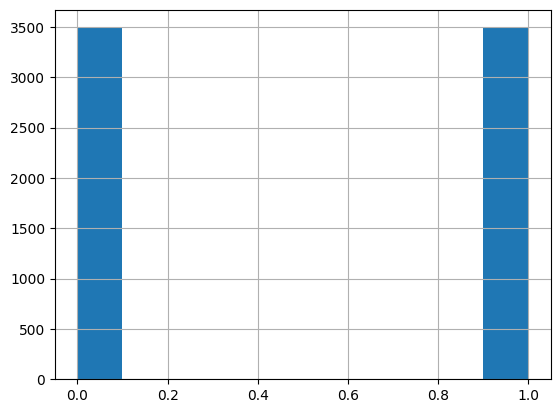

In [118]:
print(dataset_sampled_targets.value_counts())
dataset_sampled_targets.hist()

### Questão 06.

Implemente o algoritmo SMOTE e aplique-o na base de forma que a classe minoritaria cresça em 300%.

Dicas:

- Considere aumentos a partir de 100% do conjunto (dobrar o número de exemplos)

- O algoritmo SMOTE executa as seguinte etapas (Adaptado do artigo: https://arxiv.org/pdf/1106.1813.pdf):

  - Encontre os k vizinho mais próximo (distância euclidiana do vetor de atributos) de cada elemento da classe minoritaria
  - Para cada elemento E da classe minoritaria:
      - Escolha um dos k vizinhos de E, L aleatoriamente
      - Calcule a diferença D entre os atributos (L-E)
      - Calcule um número aleatório G entre 0 e 1
      - Novo elemento = E + D*G

- Dados dois numpy arrays x e y, a distância euclidiana pode ser calculada com `np.linalg.norm(x-y)`

Pseudo-código no artigo:

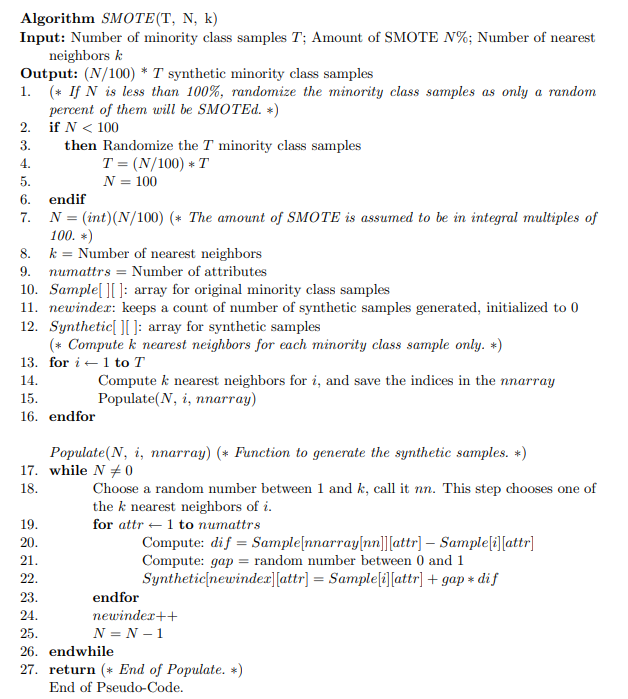

In [243]:
#########################################################################

def nn(df, k):
  # Calculo da distancia euclidiana:
  dists = np.zeros((len(df), len(df)))
  for i in range(len(df)):
      for j in range(i+1, len(df)):
          dist = np.linalg.norm(df.iloc[i] - df.iloc[j])
          dists[i][j] = dist
          dists[j][i] = dist

  # Encontrando os 'k' vizinhos mais próximos:
  k_proximos = np.argsort(dists, axis=1)[:,1:k+1]

  return k_proximos

#------------------------------------------------------------------------


#########################################################################

def populate(df, vizinhos, N):

  amostras = N * len(df)
  df_sint = []

  for i in range(amostras):
     
     # Escolha de um elemento aleatório da amostra e de um vizinho dentre os disponíveis
     index = np.random.randint(len(df))
     k = np.random.randint(vizinhos.shape[1])
     
     # Calculando o novo elemento baseado na diferença da amostra escolhida com um dos vizinhos, acrescido de um gap entre 0 e 1
     diff = df.iloc[index] - df.iloc[k]
     gap = np.random.rand()
     valor_sint = df.iloc[k] + gap * diff

     df_sint.append(valor_sint)
   
  return df_sint


#------------------------------------------------------------------------


#########################################################################

# SMOTE (T, N, k)
def smote(df, pct_novos_ex= 300, num_vizinhos= 3):
  '''
  df: dataframe com a base de dados (apenas atributos numericos)
  num_vizinhos: quantos vizinhos mais próximos devemos considerar para cada exemplo existente
  pct_novos: quantos exemplos criar. Ex: 300 = deixar a classe minoritaria 3x maior
  '''

  N = pct_novos_ex // 100
  k = num_vizinhos

  ### Define a classe minoritária:
  
  # Nome da classe target (é o nome da última coluna - no exemplo, 'Class'):
  target = df.iloc[:,-1:].columns[0]
  # Label da classe minoritária (no exemplo, é '1', que representa que houve fraude):
  min = df[target].value_counts().sort_values().index[0]
  # Cria um dataframe apenas com a classe minoritária:
  df_min = df[df[target] == min]
  # Exclui a coluna target para o cálculo dos novos dados (depois será acrescentada novamente)
  df_min = df_min.iloc[:,:-1]


  ### Encontra os vizinhos mais próximos de cada elemento da classe minoritária:
  vizinhos = nn(df_min, k)


  ### Cria um dataframe sintético com os novos elementos:
  dados_sint = populate(df_min, vizinhos, N)
  df_sint = pd.DataFrame(dados_sint, columns= df.columns)

  # Adiciona novamente a coluna target, com o valor da classe minoritária:
  df_sint[target] = min
  
  # Retorna o dataframe original acrescido dos novos dados sinteticamente gerados:
  return pd.concat([df, df_sint])

#------------------------------------------------------------------------

In [244]:
dat = dados.drop(columns=['Time'])
df_final = smote(dat)

In [247]:
print("Distribuição original dos dados:\n",dados['Class'].value_counts())
print("\nNova distribuição de dados:\n",df_final['Class'].value_counts())

Distribuição original dos dados:
 0    10000
1      492
Name: Class, dtype: int64

Nova distribuição de dados:
 0    10000
1     1968
Name: Class, dtype: int64


In [239]:
df_final.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
541,-2.312227,1.951992,-1.609851,3.997906,-0.522188,-1.426545,-2.537387,1.391657,-2.770089,-2.772272,...,0.517232,-0.035049,-0.465211,0.320198,0.044519,0.177840,0.261145,-0.143276,0.00,1
623,-3.043541,-3.157307,1.088463,2.288644,1.359805,-1.064823,0.325574,-0.067794,-0.270953,-0.838587,...,0.661696,0.435477,1.375966,-0.293803,0.279798,-0.145362,-0.252773,0.035764,529.00,1
4920,-2.303350,1.759247,-0.359745,2.330243,-0.821628,-0.075788,0.562320,-0.399147,-0.238253,-1.525412,...,-0.294166,-0.932391,0.172726,-0.087330,-0.156114,-0.542628,0.039566,-0.153029,239.93,1
6108,-4.397974,1.358367,-2.592844,2.679787,-1.128131,-1.706536,-3.496197,-0.248778,-0.247768,-4.801637,...,0.573574,0.176968,-0.436207,-0.053502,0.252405,-0.657488,-0.827136,0.849573,59.00,1
6329,1.234235,3.019740,-4.304597,4.732795,3.624201,-1.357746,1.713445,-0.496358,-1.282858,-2.447469,...,-0.379068,-0.704181,-0.656805,-1.632653,1.488901,0.566797,-0.010016,0.146793,1.00,1


In [240]:
df_final.describe()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,11968.000000,11968.000000,11968.000000,11968.000000,11968.000000,11968.000000,11968.000000,11968.000000,11968.000000,11968.000000,...,11968.000000,11968.000000,11968.000000,11968.000000,11968.000000,11968.000000,11968.000000,11968.000000,11968.000000,11968.000000
mean,-0.673609,0.399485,-0.740715,0.659289,-0.332475,-0.190288,-0.614855,0.097955,-0.323361,-0.676442,...,0.094042,-0.007035,0.014677,-0.009832,-0.003998,-0.005815,0.015258,-0.000481,101.251427,0.164439
std,3.017630,2.175423,3.129519,2.145616,2.132101,1.368820,2.766941,2.153869,1.492512,2.384017,...,1.246457,0.784726,0.744871,0.576756,0.538164,0.468734,0.536107,0.323271,236.852054,0.370688
min,-30.552380,-28.416644,-31.103685,-4.825500,-22.105532,-8.710536,-43.557242,-41.044261,-13.434066,-24.588262,...,-22.797604,-8.887017,-26.751119,-2.687773,-7.495741,-1.435545,-7.263482,-8.464609,0.000000,0.000000
25%,-1.446241,-0.536497,-1.401671,-0.687067,-0.850496,-0.919255,-0.788649,-0.198376,-0.930471,-0.914594,...,-0.207328,-0.530667,-0.173637,-0.331346,-0.308945,-0.323251,-0.071228,-0.058241,5.990000,0.000000
50%,-0.368941,0.204451,-0.111954,0.285148,-0.142337,-0.375701,-0.071111,0.056655,-0.198726,-0.224715,...,0.011723,0.004158,-0.004442,0.026552,0.016505,-0.057019,0.012451,0.012402,27.830000,0.000000
75%,1.222862,1.089363,0.872120,1.391567,0.569513,0.280323,0.486354,0.437133,0.483847,0.284756,...,0.265915,0.505972,0.173746,0.398563,0.332129,0.235082,0.146515,0.090854,100.000000,0.000000
max,2.385792,22.057729,4.017561,12.114672,16.160824,15.323769,18.585208,20.007208,10.392889,13.644460,...,27.202839,8.361985,12.214433,3.990646,3.332320,3.463246,5.480808,9.876371,7636.300000,1.000000


In [241]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11968 entries, 541 to Unnamed 1474
Data columns (total 30 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   V1      11968 non-null  float64
 1   V2      11968 non-null  float64
 2   V3      11968 non-null  float64
 3   V4      11968 non-null  float64
 4   V5      11968 non-null  float64
 5   V6      11968 non-null  float64
 6   V7      11968 non-null  float64
 7   V8      11968 non-null  float64
 8   V9      11968 non-null  float64
 9   V10     11968 non-null  float64
 10  V11     11968 non-null  float64
 11  V12     11968 non-null  float64
 12  V13     11968 non-null  float64
 13  V14     11968 non-null  float64
 14  V15     11968 non-null  float64
 15  V16     11968 non-null  float64
 16  V17     11968 non-null  float64
 17  V18     11968 non-null  float64
 18  V19     11968 non-null  float64
 19  V20     11968 non-null  float64
 20  V21     11968 non-null  float64
 21  V22     11968 non-null  float64